<a href="https://colab.research.google.com/github/fboldt/postre/blob/main/aula3b_knn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
from sklearn.datasets import load_breast_cancer
dataset = load_breast_cancer()
X, y = dataset.data, dataset.target
X.shape, y.shape

((569, 30), (569,))

In [2]:
from sklearn.model_selection import train_test_split
Xtr, Xte, ytr, yte = train_test_split(X, y, test_size=0.2, random_state=42)

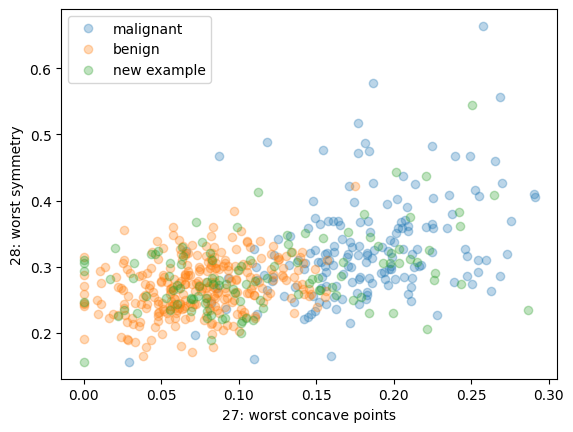

In [4]:
import matplotlib.pyplot as plt
i, j = 27, 28
plt.xlabel(f"{i}: {dataset.feature_names[i]}")
plt.ylabel(f"{j}: {dataset.feature_names[j]}")
for k in set(ytr):
  plt.plot(Xtr[:,i][ytr==k], Xtr[:,j][ytr==k], "o", alpha=0.3,
           label=f"{dataset.target_names[k]}")
plt.plot(Xte[:,i], Xte[:,j], "o", alpha=0.3, label=f"new example")
plt.legend()
plt.show()

In [8]:
import numpy as np
from sklearn.base import BaseEstimator, ClassifierMixin

class KNN(BaseEstimator, ClassifierMixin):
  def fit(self, X, y):
    self.X = X
    self.y = y
  def distancia(self, x):
    diferenca = self.X - x
    quadrado = diferenca**2
    soma = np.sum(quadrado, axis=1)
    dist = np.sqrt(soma)
    return dist
  def predict(self, X, y=None):
    ypred = np.empty((X.shape[0],))
    for i in range(X.shape[0]):
      distancias  = self.distancia(X[i])
      vizinho = np.argmin((distancias))
      ypred[i] = self.y[vizinho]
    return ypred

In [9]:
from sklearn.metrics import accuracy_score
modelo = KNN()
modelo.fit(Xtr, ytr)
ypred = modelo.predict(Xte)
accuracy_score(yte, ypred)

0.9298245614035088

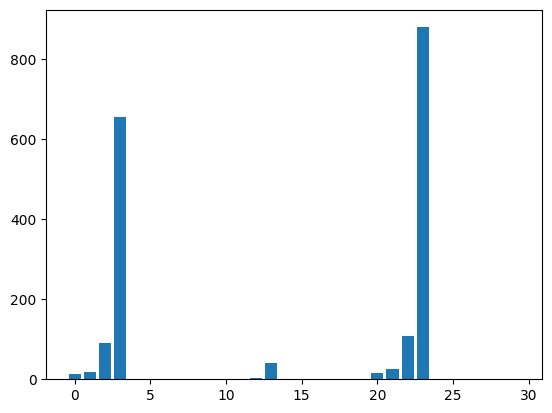

In [10]:
plt.bar(list(range(X.shape[1])), np.mean(X, axis=0))
plt.show()

In [11]:
from sklearn.linear_model import Perceptron
modelo = Perceptron()
modelo.fit(Xtr, ytr)
ypred = modelo.predict(Xte)
accuracy_score(yte, ypred)

0.9473684210526315

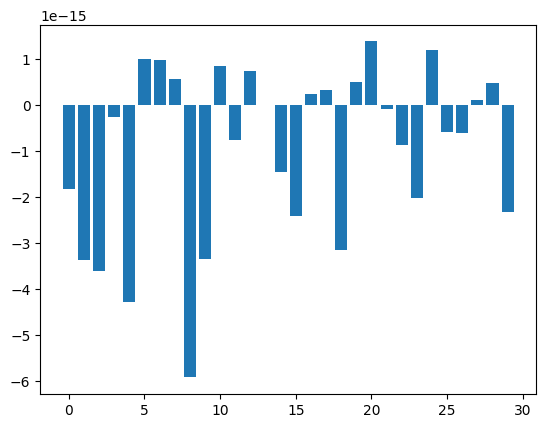

In [12]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
XtrN = scaler.fit_transform(Xtr)
XteN = scaler.transform(Xte)
plt.bar(list(range(X.shape[1])), np.mean(XtrN, axis=0))
plt.show()

In [13]:
modelo = Perceptron()
modelo.fit(XtrN, ytr)
ypred = modelo.predict(XteN)
accuracy_score(yte, ypred)

0.9736842105263158

In [15]:
from sklearn.neighbors import KNeighborsClassifier
modelo = KNeighborsClassifier(n_neighbors=1)
modelo.fit(XtrN, ytr)
ypred = modelo.predict(XteN)
accuracy_score(yte, ypred)

0.9385964912280702

In [21]:
from sklearn.model_selection import cross_validate

modelo = KNeighborsClassifier(n_neighbors=1)
scores = cross_validate(modelo, X, y)
scores, np.mean(scores['test_score'])

({'fit_time': array([0.00084949, 0.00148177, 0.00072789, 0.0007205 , 0.000705  ]),
  'score_time': array([0.01480985, 0.02037811, 0.00951552, 0.0099175 , 0.00880265]),
  'test_score': array([0.85964912, 0.92982456, 0.9122807 , 0.9122807 , 0.91150442])},
 0.9051079024996118)

In [24]:
modelo = KNeighborsClassifier()
scores = cross_validate(modelo, X, y)
scores, np.mean(scores['test_score'])

({'fit_time': array([0.00091219, 0.00089335, 0.00069809, 0.00073767, 0.00088978]),
  'score_time': array([0.05913115, 0.01041722, 0.01147914, 0.01117134, 0.01205587]),
  'test_score': array([0.88596491, 0.93859649, 0.93859649, 0.94736842, 0.92920354])},
 0.9279459711224964)

In [25]:
modelo = Perceptron()
scores = cross_validate(modelo, X, y)
scores, np.mean(scores['test_score'])

({'fit_time': array([0.00703835, 0.00335622, 0.00330687, 0.00345826, 0.00264907]),
  'score_time': array([0.00117874, 0.00109458, 0.00109863, 0.0010457 , 0.00106907]),
  'test_score': array([0.92982456, 0.88596491, 0.87719298, 0.87719298, 0.84955752])},
 0.883946592144077)

In [26]:
### ISSO É MUITO ERRADO!!! ###
modelo = Perceptron()
scaler = StandardScaler()
### NUNCA FAÇA ISSO!!! ###
scores = cross_validate(modelo, scaler.fit_transform(X), y)
scores, np.mean(scores['test_score'])

({'fit_time': array([0.00245523, 0.00546074, 0.00226045, 0.00214982, 0.00230479]),
  'score_time': array([0.0033679 , 0.00108838, 0.00097179, 0.00364685, 0.00100732]),
  'test_score': array([0.96491228, 0.96491228, 0.97368421, 0.95614035, 0.96460177])},
 0.9648501785437045)

In [27]:
### FORMA HONESTA ###
from sklearn.pipeline import Pipeline

modelo = Pipeline([
    ("scaler", StandardScaler()),
    ("clf", Perceptron())
])

scores = cross_validate(modelo, X, y)
scores, np.mean(scores['test_score'])

({'fit_time': array([0.00571561, 0.00414395, 0.00346088, 0.00268984, 0.00228143]),
  'score_time': array([0.00114202, 0.00115991, 0.00114942, 0.00079846, 0.00078535]),
  'test_score': array([0.95614035, 0.94736842, 0.97368421, 0.95614035, 0.98230088])},
 0.9631268436578171)

In [28]:
### ISSO É MUITO ERRADO!!! ###
modelo = KNeighborsClassifier()
scaler = StandardScaler()
### NUNCA FAÇA ISSO!!! ###
scores = cross_validate(modelo, scaler.fit_transform(X), y)
scores, np.mean(scores['test_score'])

({'fit_time': array([0.00093842, 0.00070238, 0.00100803, 0.00103855, 0.00099421]),
  'score_time': array([0.04005933, 0.0200665 , 0.01067519, 0.01099086, 0.01160288]),
  'test_score': array([0.96491228, 0.95614035, 0.98245614, 0.95614035, 0.96460177])},
 0.9648501785437045)

In [29]:
### FORMA HONESTA ###
from sklearn.pipeline import Pipeline

modelo = Pipeline([
    ("scaler", StandardScaler()),
    ("clf", KNeighborsClassifier())
])

scores = cross_validate(modelo, X, y)
scores, np.mean(scores['test_score'])

({'fit_time': array([0.0025723 , 0.00953722, 0.00238419, 0.00237894, 0.00207758]),
  'score_time': array([0.15445757, 0.09411788, 0.01173878, 0.01066732, 0.01985931]),
  'test_score': array([0.96491228, 0.95614035, 0.98245614, 0.95614035, 0.96460177])},
 0.9648501785437045)